In [1]:
import numpy as np
import matplotlib.pyplot as plt

height = 32
width = 32

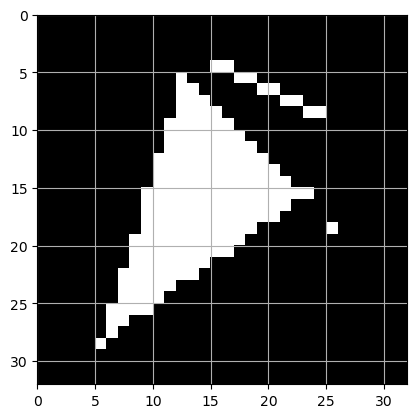

In [51]:
fig, axes = plt.subplots()

frame_buffer = np.zeros((height, width))

extent = (0, width, height, 0)

def desenha_ponto(p):
    x, y = p
    frame_buffer[y][x] = 1

desenha_ponto((25, 18))

def desenha_linha(p0, p1):
    x0, y0 = p0
    x1, y1 = p1

    dx = x1 - x0
    dy = y1 - y0

    if dx != 0:
        s = dy / dx
        v = y0
        if x1 > x0:
            for u in range(x0, x1 + 1):
                desenha_ponto((u, round(v)))
                v += s
        else:
            for u in range(x0, x1 - 1, -1):
                desenha_ponto((u, round(v)))
                v += s

    else: 
        if y1 > y0:
            for v in range(y0, y1 + 1):
                desenha_ponto((x0, v))
        else:
            for v in range(y0, y1 - 1, -1):
                desenha_ponto((x0, v))

desenha_linha((15, 4), (24, 8))

def calcula_l(p0, p1, p):
    x0, y0 = p0
    x1, y1 = p1
    x, y = p
    
    l = (y1 - y0)*x - (x1 - x0)*y + y0*(x1 - x0) - x0*(y1 - y0)
    return l
    
def desenha_triangulo(p0, p1, p2):
    x0, y0 = p0
    x1, y1 = p1
    x2, y2 = p2
    
    sentido = (x2 - x0)*(y1 - y0) - (y2 - y0)*(x1 - x0)

    if sentido > 0:
        p1, p2 = p2, p1

    for i in range (min(x0, x1, x2), max(x0, x1, x2) + 1):
        for j in range (min(y0, y1, y2), max(y0, y1, y2) + 1):
            p = (i, j)
            l1 = calcula_l(p0, p2, p)
            l2 = calcula_l(p2, p1, p)
            l3 = calcula_l(p1, p0, p)

            if l1 >= 0 and l2 >= 0 and l3 >= 0:
                desenha_ponto(p)

# desenha_triangulo((2,11), (11,7), (6, 2))
# desenha_triangulo((5,28), (15,31), (23, 15))
desenha_triangulo((5,28), (12,5), (23, 15))

axes.imshow(frame_buffer, interpolation='nearest', extent=extent, cmap='gray')
axes.grid()